In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

path = kagglehub.dataset_download("ivankmk/thousand-ml-jobs-in-usa")
print("Path to dataset files:", path)
print(os.listdir(path))

# Display settings
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

Path to dataset files: /Users/dzthai/.cache/kagglehub/datasets/ivankmk/thousand-ml-jobs-in-usa/versions/1
['1000_ml_jobs_us.csv']


In [9]:
# Load data
csv_path = f"{path}/1000_ml_jobs_us.csv"  # replace with the actual filename
df = pd.read_csv(csv_path)

# Basic summary
print("\n--- Info ---")
df.info()
print("\n--- Missing values ---")
print(df.isna().sum().sort_values(ascending=False).head(20))
print("\n--- Basic description (for numeric if any) ---")
print(df.describe(include=[np.number]))
print("\n--- Basic description (for object columns) ---")
print(df.describe(include=[object]).T)

# show first 3 descriptions
df['job_description_text'].head(3).values


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                997 non-null    int64 
 1   job_posted_date           997 non-null    object
 2   company_address_locality  950 non-null    object
 3   company_address_region    884 non-null    object
 4   company_name              997 non-null    object
 5   company_website           983 non-null    object
 6   company_description       985 non-null    object
 7   job_description_text      996 non-null    object
 8   seniority_level           988 non-null    object
 9   job_title                 997 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.0+ KB

--- Missing values ---
company_address_region      113
company_address_locality     47
company_website              14
company_description          12
seniority_level               

array(['OverviewUpper Hand is embarking on an exciting journey to harness the power of machine learning, data science, and AI to enhance sports training and management, and we’re looking for an energetic and talented Machine Learning Engineer and Data Scientist to join our AI Data Science Team. As part of our team, you will be instrumental in building and deploying machine learning models while ensuring they align with real business use cases. You will also leverage your expertise in data science to develop data-driven insights and optimize AI-driven initiatives. This role is ideal for someone who thrives in a fast-paced, collaborative environment, loves solving real-world problems through machine learning, and has a passion for communication and presenting solutions.What You’ll DoBuild, deploy, and maintain scalable machine learning models that solve key business challenges.Work closely with external clients and internal cross-functional teams to translate business needs into machine 

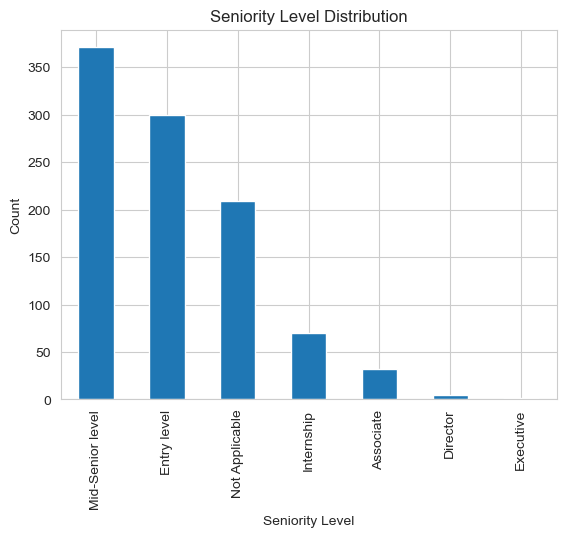

In [ ]:
df['seniority_level'].value_counts().plot(kind='bar', title='Seniority Level Distribution')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# Clean / transform date column if present
if 'date_posted' in df.columns:
    df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')
    print("\nDate range:", df['date_posted'].min(), "->", df['date_posted'].max())

# Extract seniority from job titles
def extract_seniority(title):
    title_lower = str(title).lower()
    if 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'Senior'
    elif 'junior' in title_lower or 'entry' in title_lower or 'associate' in title_lower:
        return 'Junior'
    else:
        return 'Mid'
    
df['seniority'] = df['job_title'].apply(extract_seniority)
print("\nSeniority distribution:")
print(df['seniority'].value_counts())

# Basic visualizations
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='seniority', order=['Junior','Mid','Senior'])
plt.title('Job postings by seniority')
plt.show()

# Locations distribution
if 'location' in df.columns:
    top_locations = df['location'].value_counts().nlargest(10)
    print("\nTop 10 locations (by posting count):")
    print(top_locations)
    
    plt.figure(figsize=(10,6))
    sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
    plt.title('Top 10 locations for ML job postings')
    plt.xlabel('Number of postings')
    plt.ylabel('Location')
    plt.show()

# Word-cloud / frequent words in job titles or descriptions
from collections import Counter
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

# sample on job_title
all_titles = " ".join(df['job_title'].dropna().astype(str).tolist())
words = clean_text(all_titles).split()
common_words = Counter(words).most_common(30)
print("\nMost common words in job titles:")
print(common_words)

# If job_description exists, maybe show length
if 'job_description' in df.columns:
    df['desc_length'] = df['job_description'].astype(str).apply(len)
    print("\nJob description length stats:")
    print(df['desc_length'].describe())
    
    plt.figure(figsize=(8,5))
    sns.histplot(df['desc_length'], bins=50)
    plt.title('Distribution of job description lengths')
    plt.xlabel('Length (characters)')
    plt.show()

# Filter to ML Engineer roles specifically (if you want to focus)
ml_roles = df[df['job_title'].str.contains(r'(?i)machine learning engineer|ml engineer', na=False)]
print("\nFiltered ML Engineer roles: count =", ml_roles.shape[0])
ml_roles['seniority'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Seniority distribution among ML Engineer roles')
plt.show()

# Save a cleaned subset if needed
ml_roles.to_csv('ml_engineer_roles_subset.csv', index=False)
print("\nSaved subset of ML Engineer roles to CSV.")

# Further steps you might consider:
# - Extract required skills/technologies from descriptions (regex for “TensorFlow”, “PyTorch”, “MLOps”, etc.)
# - Time-series analysis: postings over time (if date_posted is available)
# - Salary information (if available)
# - Company size / industry (if columns exist)
# - Text-embedding / NLP clustering of job descriptions

print("\n*** End of preliminary EDA ***")

FileNotFoundError: [Errno 2] No such file or directory: '1000_ml_jobs_us.csv'